In [1]:
import os
import pickle
import random
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [7]:
path = os.environ.get("PATH")
additional_path_PC = 'C:\\Users\\Michi\\Anaconda3\\envs\\python_v3-8;C:\\Users\\Michi\\Anaconda3\\envs\\python_v3-8\\Library\\mingw-w64\\bin;C:\\Users\\Michi\\Anaconda3\\envs\\python_v3-8\\Library\\usr\\bin;C:\\Users\\Michi\\Anaconda3\\envs\\python_v3-8\\Library\\bin;C:\\Users\\Michi\\Anaconda3\\envs\\python_v3-8\\Scripts;C:\\Users\\Michi\\Anaconda3\\envs\\python_v3-8\\bin;C:\\Users\\Michi\\Anaconda3\\condabin'
additional_path_laptop = "C:\\Users\\micha\\anaconda3\\envs\\ai38;C:\\Users\\micha\\anaconda3\\envs\\ai38\\Library\\mingw-w64\\bin;C:\\Users\\micha\\anaconda3\\envs\\ai38\\Library\\usr\\bin;C:\\Users\\micha\\anaconda3\\envs\\ai38\\Library\\bin;C:\\Users\\micha\\anaconda3\\envs\\ai38\\Scripts;C:\\Users\\micha\\anaconda3\\envs\\ai38\\bin;C:\\Users\\micha\\anaconda3\\condabin;"

min_additional_path_PC = "C:\\Users\\Michi\\Anaconda3\\envs\\python_v3-8\\Library\\bin;"
additional_path_laptop = "C:\\Users\\micha\\anaconda3\\envs\\ai38\\Library\\bin;"

combined_path = min_additional_path_PC + additional_path_laptop + path
os.environ["PATH"] = combined_path

In [8]:
root_dir = "python"
_, current_folder = os.path.split(os.getcwd())
if current_folder != root_dir:
    os.chdir("../")
    
os.getcwd()

'C:\\Michi\\acoustic_covid_detection\\python'

In [9]:
DATA_PATH = "data/Coswara_processed/pickles/participant_objects.pickle"
with open(DATA_PATH, "rb") as f:
    participants = pickle.load(f)

941


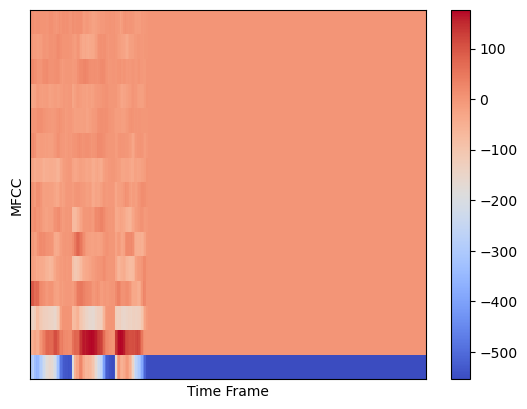

In [10]:
#participant = random.choice(participants)
idx = random.randint(0,2700)
# reproducible participant with zeros padded --> constant mfccs
idx = 941

print(idx)
participant = participants[idx]
participant.heavy_cough.show_MFCCs()

In [11]:
mfccs = participant.heavy_cough.get_MFCCs()
mfccs.shape

(15, 259)

In [12]:
print(mfccs[:, 158])
# values of a timestep that was just zeros in the time domain

[-554.3269    0.        0.        0.        0.        0.        0.
    0.        0.        0.        0.        0.        0.        0.
    0.    ]


In [13]:
def show_mfcc_distribution_of_random_participant(participant_idx=0, starting_mfcc=1):
    participant = participants[participant_idx]
    mfccs = participant.heavy_cough.get_MFCCs()
    #elimiate the timesteps with only zeros in time domain
    # print(f"shape before: {mfccs.shape}")
    mfccs = mfccs[:,np.abs(mfccs[1:, :]).sum(axis=0) > 5]
    # print(f"shape after: {mfccs.shape}")    
    print(mfccs[1,:].shape)
    bins = np.linspace(np.min(mfccs), np.max(mfccs), 50)
    bins = np.linspace(-600, 150, 50)
    bins = np.linspace(-100, 150, 50)

    plt.rcParams["figure.autolayout"] = True
    # fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(5,8))
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,7))
    for n, ax in enumerate(axes.ravel()):
        ax.hist(mfccs[n+starting_mfcc,:], bins=bins, log=False)
        ax.set_title(f"MFCC #{n+starting_mfcc}")
    print(np.mean(mfccs[0,:]))
    print(np.std(mfccs[0,:]))

In [14]:
idx=random.randint(0, len(participants)-1)

In [15]:
participant = participants[idx]
mfccs = participant.heavy_cough.get_MFCCs()
bin_one = mfccs[1,:]
bin_one = bin_one[bin_one>0]
np.mean(bin_one)
#bin_one[:10]

55.406143

(259,)
-433.50574
138.3518


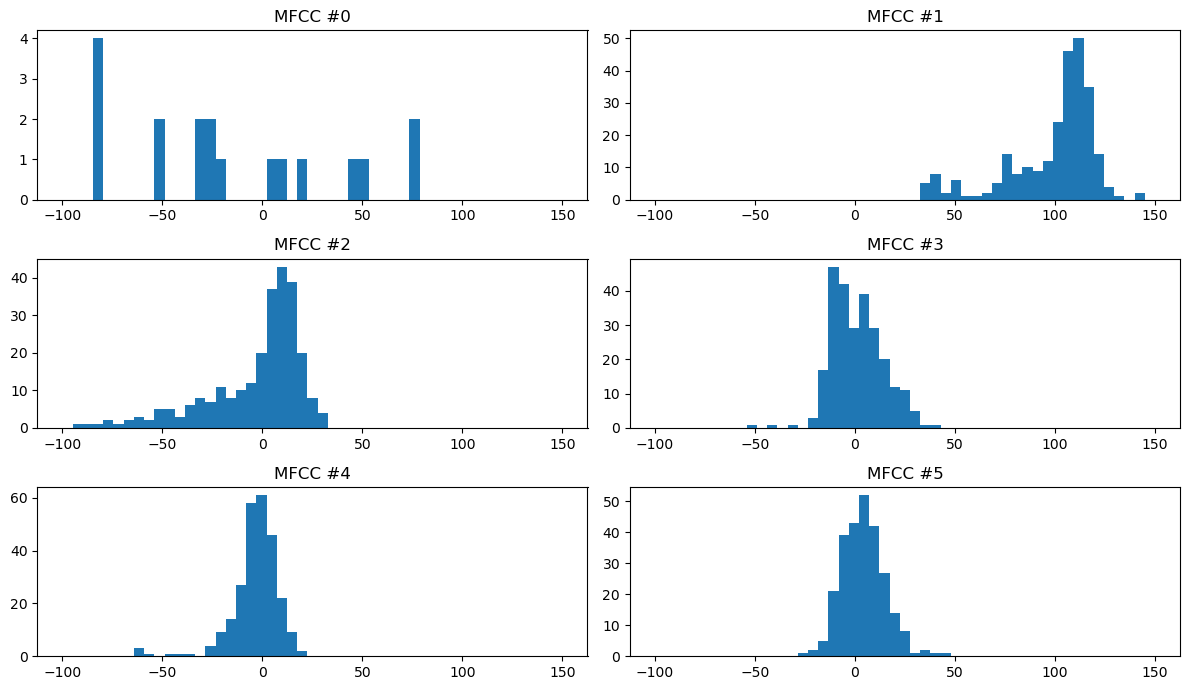

In [16]:
idx=random.randint(0, len(participants)-1)
show_mfcc_distribution_of_random_participant(participant_idx=idx, starting_mfcc=0)

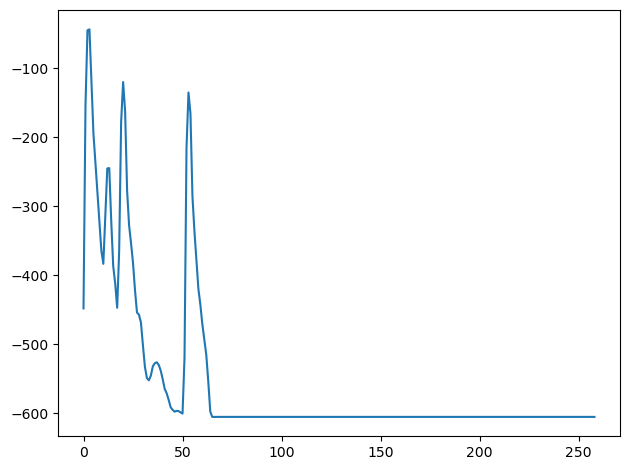

In [17]:
plt.plot(mfccs[0,:])

In [18]:
def get_participant_mfccs_without_silence(participant):
    mfccs = participant.heavy_cough.MFCCs
    mfccs = mfccs[:,np.abs(mfccs[1:, :]).sum(axis=0) > 5]
    return mfccs

def statistics_from_mfccs(mfccs):
    bin_mean = mfccs.mean(axis=1)
    bin_std = mfccs.std(axis=1)
    return np.expand_dims(bin_mean, axis=1), np.expand_dims(bin_std, axis=1)

In [378]:
all_mfccs = np.empty((15,1))
all_means = np.empty((15,1))
all_stds = np.empty((15,1))
for i, participant in enumerate(participants):
    clear_output(wait=True)
    print(f"{i+1} / {len(participants)}")
    mfcc = get_participant_mfccs_without_silence(participant)
    mu, sigma = statistics_from_mfccs(mfcc)
    all_mfccs = np.append(all_mfccs, mfcc, axis=1)
    all_means = np.append(all_means, mu, axis=1)
    all_stds = np.append(all_stds, sigma, axis=1)

# remove crazy outliers    
all_mfccs = all_mfccs[:, all_mfccs[0,:] > -1000]

overall_mean = all_mfccs.mean(axis=1)
overall_std = all_mfccs.std(axis=1)


overall_mean, overall_std

2648 / 2648


(array([-337.54123926,   74.1416017 ,  -25.49031507,   12.97844972,
         -17.78460619,    5.06947861,  -17.1468663 ,   -9.3684201 ,
         -13.06483431,   -4.86935919,   -4.8154816 ,   -9.10169504,
          -2.58435896,   -7.08841977,   -4.03153265]),
 array([184.63268878,  55.8840843 ,  44.66783505,  28.65932228,
         29.94806935,  22.27000562,  23.15682288,  17.4726134 ,
         17.4204398 ,  15.0654339 ,  13.35634458,  13.49943455,
         12.3112151 ,  12.98803148,  11.22757866]))

In [379]:
all_mfccs.shape, all_stds.shape, all_means.shape

((15, 452451), (15, 2649), (15, 2649))

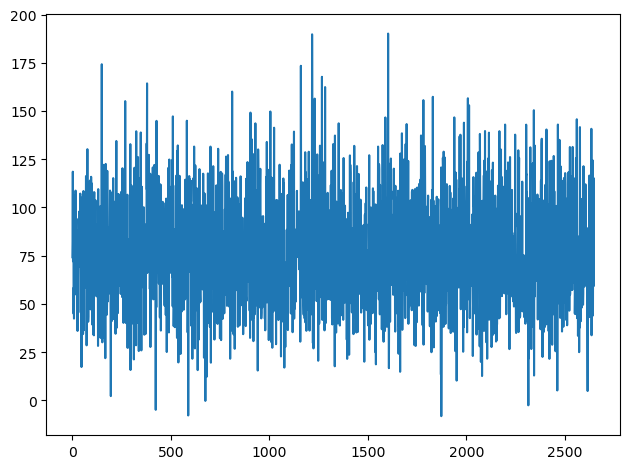

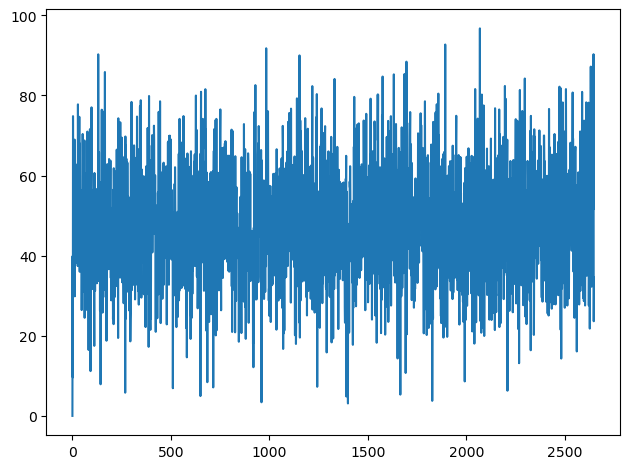

In [380]:
plt.plot(all_means[1,:])
plt.figure()
plt.plot(all_stds[1,:])

(-337.5412392619072, 184.63268878082187)

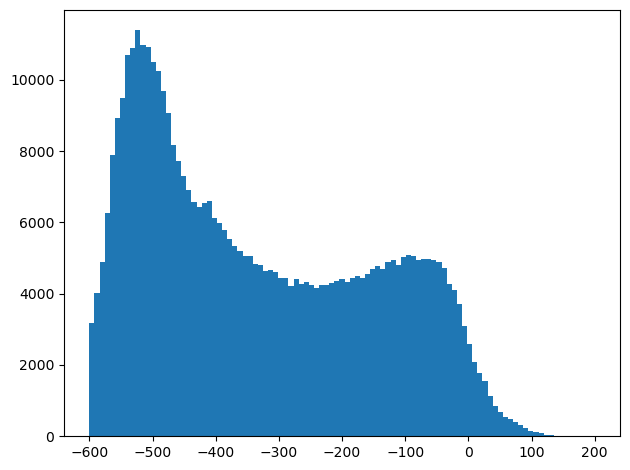

In [386]:
binn = 0
plt.hist(all_mfccs[binn,:], np.linspace(-600, 200, 100))
overall_mean[binn], overall_std[binn]

(-331.93631671907053, 166.98202829371763)

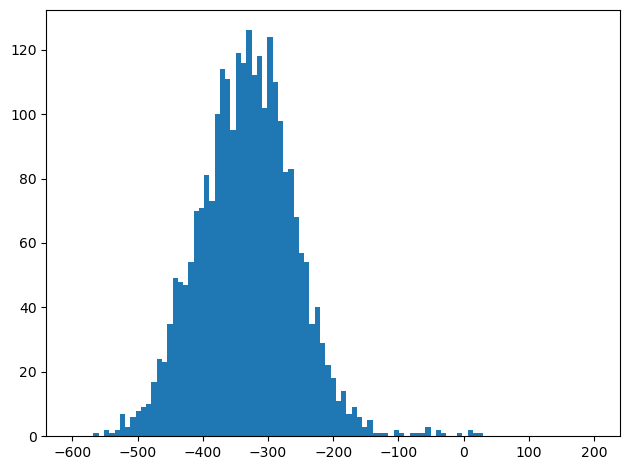

In [388]:
plt.hist(all_means[0,:], np.linspace(-600, 200, 100))
np.mean(all_means[0,:]), np.mean(all_stds[0,:]), 

In [390]:
all_means.mean(axis=1), all_stds.mean(axis=1)

(array([-331.93631672,   76.30579642,  -27.15779265,   13.73618528,
         -18.95534619,    5.1736871 ,  -17.85339021,   -9.7329727 ,
         -13.3290326 ,   -5.40552042,   -4.99036132,   -9.46462743,
          -2.59663059,   -7.63705145,   -4.12569328]),
 array([166.98202829,  47.80791132,  37.20069457,  23.26379328,
         24.13115699,  17.50971507,  18.8768299 ,  14.22171239,
         14.36668731,  12.13266992,  11.13963721,  11.35840227,
         10.25239385,  10.72223476,   9.42287716]))

In [4]:
mean_of_means = np.array([-331.93631672,   76.30579642,  -27.15779265,   13.73618528,
                     -18.95534619,    5.1736871 ,  -17.85339021,   -9.7329727 ,
                     -13.3290326 ,   -5.40552042,   -4.99036132,   -9.46462743,
                      -2.59663059,   -7.63705145,   -4.12569328])
mean_of_stds = np.array([166.98202829,  47.80791132,  37.20069457,  23.26379328,
                         24.13115699,  17.50971507,  18.8768299 ,  14.22171239,
                         14.36668731,  12.13266992,  11.13963721,  11.35840227,
                         10.25239385,  10.72223476,   9.42287716])

In [6]:
mean_of_means, mean_of_stds

(array([-331.93631672,   76.30579642,  -27.15779265,   13.73618528,
         -18.95534619,    5.1736871 ,  -17.85339021,   -9.7329727 ,
         -13.3290326 ,   -5.40552042,   -4.99036132,   -9.46462743,
          -2.59663059,   -7.63705145,   -4.12569328]),
 array([166.98202829,  47.80791132,  37.20069457,  23.26379328,
         24.13115699,  17.50971507,  18.8768299 ,  14.22171239,
         14.36668731,  12.13266992,  11.13963721,  11.35840227,
         10.25239385,  10.72223476,   9.42287716]))

In [28]:
a = np.array([[1,2,3],[3,3,3]])
b = np.ones(3)*2


a,b

(array([[1, 2, 3],
        [3, 3, 3]]),
 array([2., 2., 2.]))

In [29]:
a.shape,b.shape

((2, 3), (3,))

In [31]:
a/b

array([[0.5, 1. , 1.5],
       [1.5, 1.5, 1.5]])

In [48]:
mfccs = get_participant_mfccs_without_silence(participants[random.randint(0,2700)])

In [49]:
mfccs[:,1], mean_of_means

(array([-466.92603  ,   11.7132435,  -23.969925 ,  -16.500374 ,
         -29.741333 ,   24.590096 ,    3.800445 ,  -10.918085 ,
          14.7711735,  -12.5180645,   -7.417983 ,   -9.476158 ,
         -14.611781 ,    1.8160516,    2.172177 ], dtype=float32),
 array([-331.93631672,   76.30579642,  -27.15779265,   13.73618528,
         -18.95534619,    5.1736871 ,  -17.85339021,   -9.7329727 ,
         -13.3290326 ,   -5.40552042,   -4.99036132,   -9.46462743,
          -2.59663059,   -7.63705145,   -4.12569328]))

In [50]:
mfccs_zero_mean = (mfccs - np.expand_dims(mean_of_means, axis=1))
mfccs_zero_mean[:,1]

array([-1.34989709e+02, -6.45925529e+01,  3.18786772e+00, -3.02365591e+01,
       -1.07859868e+01,  1.94164084e+01,  2.16538353e+01, -1.18511240e+00,
        2.81002061e+01, -7.11254408e+00, -2.42762174e+00, -1.15307121e-02,
       -1.20151505e+01,  9.45310305e+00,  6.29787036e+00])

In [51]:
mfccs_normalized =  mfccs_zero_mean / np.expand_dims(mean_of_stds, axis=1)
mfccs_normalized

array([[-1.16557361, -0.80840861, -0.80618588, ..., -0.9392934 ,
        -0.91347275, -1.00828078],
       [-1.53614082, -1.35108502, -1.35694999, ..., -1.53358391,
        -1.66393361, -1.65247343],
       [ 0.66728023,  0.08569377,  0.09354877, ...,  0.76857259,
         0.67847354,  0.63055284],
       ...,
       [ 0.02519859, -1.17193611, -1.24346684, ..., -2.02568824,
        -2.32398745, -1.78479333],
       [ 0.8008595 ,  0.88163552,  0.59579255, ...,  0.79933968,
         0.19960796,  0.1899586 ],
       [ 0.83348548,  0.66835959,  0.35046048, ...,  0.36731553,
         0.32989743,  0.56978567]])

(array([13.,  9.,  2., 10., 27., 14., 12., 11.,  4.,  9.]),
 array([-1.66393361, -1.25251126, -0.84108892, -0.42966657, -0.01824423,
         0.39317811,  0.80460046,  1.2160228 ,  1.62744515,  2.03886749,
         2.45028984]),
 <BarContainer object of 10 artists>)

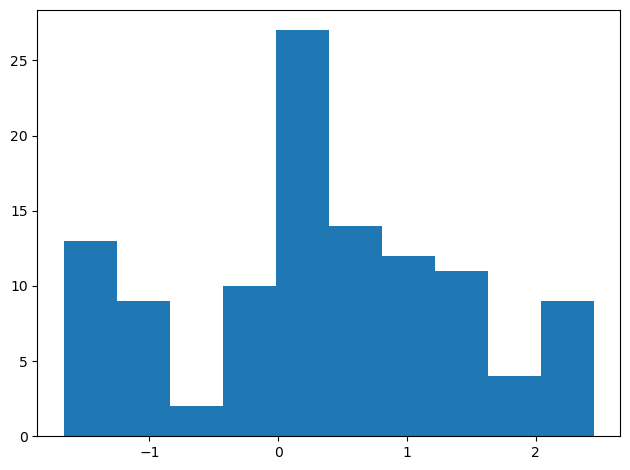

In [53]:
plt.hist(mfccs_normalized[1,:])

In [55]:
np.save("Data/Coswara_processed/pickles/mean_cough_heavy_15MFCCs.npy", mean_of_means)

In [56]:
np.save("Data/Coswara_processed/pickles/stds_cough_heavy_15MFCCs.npy", mean_of_stds)